In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./intron_DE"
cell_type1 = "Bergmann"
cell_type2 = "Purkinje"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Psg19,453.987662,3.467452,0.220760,15.706851,1.357563e-55,2.313831e-51
1,Septin4,85.370323,5.539813,0.564207,9.818756,9.349000e-23,7.967218e-19
2,Id4,56.763669,5.732944,0.713965,8.029726,9.769089e-16,5.550145e-12
3,Qk,57.442895,6.003417,0.763734,7.860616,3.822500e-15,1.628767e-11
4,Fam107a,104.456630,8.224812,1.079686,7.617779,2.580786e-14,8.797383e-11
...,...,...,...,...,...,...,...
17168,Zfp217,0.000000,NaN,NaN,NaN,NaN,NaN
17169,Zfp35,0.000000,NaN,NaN,NaN,NaN,NaN
17170,Zfp874a,0.000000,NaN,NaN,NaN,NaN,NaN
17171,Zfp956,0.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
df[df["log2FoldChange"].notna()]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Psg19,453.987662,3.467452,0.220760,15.706851,1.357563e-55,2.313831e-51
1,Septin4,85.370323,5.539813,0.564207,9.818756,9.349000e-23,7.967218e-19
2,Id4,56.763669,5.732944,0.713965,8.029726,9.769089e-16,5.550145e-12
3,Qk,57.442895,6.003417,0.763734,7.860616,3.822500e-15,1.628767e-11
4,Fam107a,104.456630,8.224812,1.079686,7.617779,2.580786e-14,8.797383e-11
...,...,...,...,...,...,...,...
17039,Zyg11b,2.663044,-0.292907,1.812136,-0.161636,8.715923e-01,1.000000e+00
17040,Zyx,2.441769,2.777830,2.461191,1.128653,2.590442e-01,1.000000e+00
17041,Zzef1,0.789444,-3.303256,3.816934,-0.865421,3.868076e-01,1.000000e+00
17042,Zzz3,3.571956,-0.705326,1.539735,-0.458083,6.468927e-01,1.000000e+00


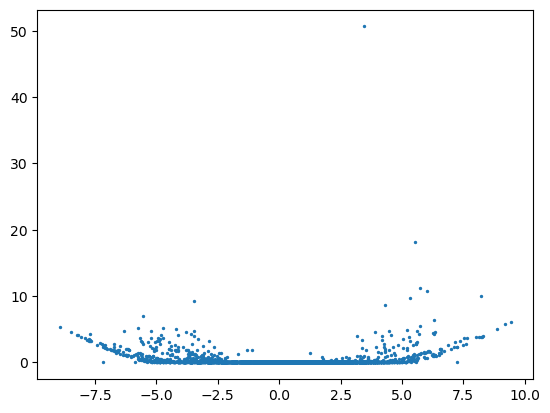

In [5]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 2 / -2 as cuttoff

In [6]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Psg19,453.987662,3.467452,0.220760,15.706851,1.357563e-55,2.313831e-51
1,Septin4,85.370323,5.539813,0.564207,9.818756,9.349000e-23,7.967218e-19
2,Id4,56.763669,5.732944,0.713965,8.029726,9.769089e-16,5.550145e-12
3,Qk,57.442895,6.003417,0.763734,7.860616,3.822500e-15,1.628767e-11
4,Fam107a,104.456630,8.224812,1.079686,7.617779,2.580786e-14,8.797383e-11
...,...,...,...,...,...,...,...
123,Cables1,16.146939,6.554313,1.633248,4.013055,5.993796e-05,8.176447e-03
125,Cntfr,16.522247,4.297322,1.070977,4.012524,6.007295e-05,8.176447e-03
127,Lgi4,16.939749,6.529505,1.629542,4.006956,6.150627e-05,8.189944e-03
129,Lsamp,13.998293,6.584151,1.648100,3.994996,6.469543e-05,8.546622e-03


In [7]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
6,Snhg10,95.323981,-3.483983,0.474430,-7.343513,2.080587e-13,5.065931e-10
8,Plekhd1,40.656867,-5.544382,0.846039,-6.553341,5.626374e-11,1.065510e-07
13,Fam107b,36.927508,-8.926051,1.516392,-5.886373,3.947626e-09,4.805953e-06
14,Zdhhc14,33.524957,-5.752521,0.983547,-5.848749,4.952838e-09,5.627744e-06
15,Hpcal1,32.270742,-4.727918,0.811925,-5.823096,5.776730e-09,6.153661e-06
...,...,...,...,...,...,...,...
124,Cacna2d2,14.227207,-5.096475,1.270929,-4.010039,6.070878e-05,8.176447e-03
126,Sptbn2,9.163097,-7.006121,1.747512,-4.009199,6.092518e-05,8.176447e-03
128,Kcnd3,17.978983,-4.506304,1.128495,-3.993199,6.518780e-05,8.546622e-03
130,Auts2,16.184179,-6.234647,1.572909,-3.963768,7.377603e-05,9.581783e-03


# proceed with threshold 2 first

In [8]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)] = cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)] = cell_type2

In [9]:
df["category"] = category

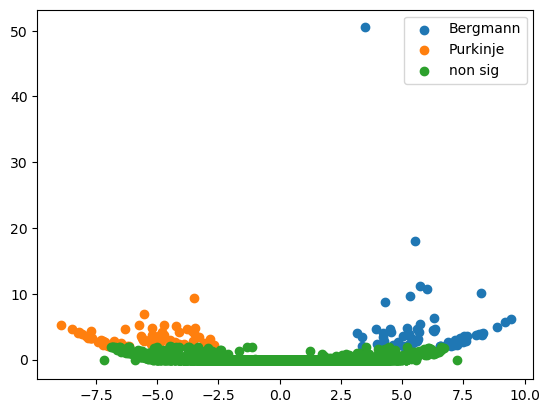

In [10]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [11]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Psg19,453.987662,3.467452,0.220760,15.706851,1.357563e-55,2.313831e-51,Bergmann
1,Septin4,85.370323,5.539813,0.564207,9.818756,9.349000e-23,7.967218e-19,Bergmann
2,Id4,56.763669,5.732944,0.713965,8.029726,9.769089e-16,5.550145e-12,Bergmann
3,Qk,57.442895,6.003417,0.763734,7.860616,3.822500e-15,1.628767e-11,Bergmann
4,Fam107a,104.456630,8.224812,1.079686,7.617779,2.580786e-14,8.797383e-11,Bergmann
...,...,...,...,...,...,...,...,...
128,Kcnd3,17.978983,-4.506304,1.128495,-3.993199,6.518780e-05,8.546622e-03,Purkinje
129,Lsamp,13.998293,6.584151,1.648100,3.994996,6.469543e-05,8.546622e-03,Bergmann
130,Auts2,16.184179,-6.234647,1.572909,-3.963768,7.377603e-05,9.581783e-03,Purkinje
131,Tnc,8.192560,6.998230,1.766170,3.962376,7.420766e-05,9.581783e-03,Bergmann


# Map back to genome

In [17]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")
meta["gene"] = meta["gene"].str.replace("March", "Marchf")
meta["gene"] = meta["gene"].str.replace("Sept", "Septin")

# Mismatch between DE gene naming and annotated namming

In [18]:
DE_sig_25kb = meta.merge(DE_genes)

In [19]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 1 gene, 0.007518796992481203 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
68,X9530059O14Rik,14.691876,-7.679457,1.626971,-4.720094,0.000002,0.000575,Purkinje


# OK! tried our best to get all genes
# Modify the second round search result

In [21]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [22]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [23]:
DE_sig_200kb = DE_sig_25kb.copy()
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,chr1-3254,chr1,84350000,84375000,Dner,chr1-g843,843.0,chr1-g421,421,23.111086,-6.744173,1.497390,-4.503951,6.670148e-06,0.001386,Purkinje
2,chr1-3256,chr1,84400000,84425000,Dner,chr1-g844,844.0,chr1-g422,422,23.111086,-6.744173,1.497390,-4.503951,6.670148e-06,0.001386,Purkinje
10,chr1-3264,chr1,84600000,84625000,Dner,chr1-g846,846.0,chr1-g423,423,23.111086,-6.744173,1.497390,-4.503951,6.670148e-06,0.001386,Purkinje
14,chr1-4067,chr1,104750000,104775000,Cdh20,chr1-g1047,1047.0,chr1-g523,523,25.158924,7.146351,1.554795,4.596329,4.299993e-06,0.000931,Bergmann
16,chr1-4069,chr1,104800000,104825000,Cdh20,chr1-g1048,1048.0,chr1-g524,524,25.158924,7.146351,1.554795,4.596329,4.299993e-06,0.000931,Bergmann
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,chr19-69,chr19,4700000,4725000,Sptbn2,chr19-g47,47.0,chr19-g23,23,9.163097,-7.006121,1.747512,-4.009199,6.092518e-05,0.008176,Purkinje
914,chr19-286,chr19,10225000,10250000,Dagla,chr19-g102,102.0,chr19-g51,51,22.500861,-8.240611,1.582461,-5.207466,1.914369e-07,0.000086,Purkinje
918,chrX-284,chrX,10475000,10500000,Tspan7,chrX-g104,104.0,chrX-g52,52,31.758453,3.163535,0.611270,5.175352,2.274821e-07,0.000095,Bergmann
923,chrX-1462,chrX,41400000,41425000,Gria3,chrX-g414,414.0,chrX-g207,207,13.330310,-6.723596,1.627531,-4.131162,3.609339e-05,0.005409,Purkinje


In [24]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

,ID,1,2,1.3,2.3
0,CLUSTER,Bergmann,Bergmann,Purkinje,Purkinje
1,X0610005C13Rik,0,1.28156580039671,0,0
2,X0610009B22Rik,0,0,0,1.43733835690721
3,X0610009L18Rik,0,0,0,1.43733835690721
4,X0610010F05Rik,0,0,1.30792047676341,0


In [25]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 3)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 3)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')
norm_counts.head()

,gene,Bergmann_1,Bergmann_2,Purkinje_1,Purkinje_2
0,X0610005C13Rik,0.0,1.281566,0.00000,0.000000
1,X0610009B22Rik,0.0,0.000000,0.00000,1.437338
2,X0610009L18Rik,0.0,0.000000,0.00000,1.437338
3,X0610010F05Rik,0.0,0.000000,1.30792,0.000000
4,X0610040B10Rik,0.0,0.000000,1.30792,1.437338


In [26]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,Bergmann_1,Bergmann_2,Purkinje_1,Purkinje_2,Bergmann_mean,Purkinje_mean
0,X0610005C13Rik,0.000000,1.281566,0.000000,0.000000,0.640783,0.000000
1,X0610009B22Rik,0.000000,0.000000,0.000000,1.437338,0.000000,0.718669
2,X0610009L18Rik,0.000000,0.000000,0.000000,1.437338,0.000000,0.718669
3,X0610010F05Rik,0.000000,0.000000,1.307920,0.000000,0.000000,0.653960
4,X0610040B10Rik,0.000000,0.000000,1.307920,1.437338,0.000000,1.372629
...,...,...,...,...,...,...,...
17168,Zyx,3.722419,0.000000,0.000000,0.000000,1.861210,0.000000
17169,Zzef1,0.000000,0.000000,1.307920,4.312015,0.000000,2.809968
17170,Zzz3,1.861210,3.844697,5.231682,4.312015,2.852954,4.771848
17171,a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, 
                                        "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)
                                       ), index = None)

In [28]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [29]:
final_200kb

,200kb name,category,Bergmann_mean,Purkinje_mean,gene
0,chr1-g421,Purkinje,0.640783,81.703805,Dner
1,chr1-g422,Purkinje,0.640783,81.703805,Dner
2,chr1-g423,Purkinje,0.640783,81.703805,Dner
3,chr1-g523,Bergmann,96.527182,0.653960,Cdh20
4,chr1-g524,Bergmann,96.527182,0.653960,Cdh20
...,...,...,...,...,...
219,chr9-g557,Purkinje,0.000000,58.563232,Stac
220,chr9-g558,Purkinje,0.000000,58.563232,Stac
221,chrX-g207,Purkinje,0.000000,30.003720,Gria3
222,chrX-g208,Purkinje,0.000000,30.003720,Gria3


In [30]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,Bergmann_mean,Purkinje_mean,gene,chrom
0,chr1-g421,Purkinje,0.640783,81.703805,Dner,chr1
1,chr1-g422,Purkinje,0.640783,81.703805,Dner,chr1
2,chr1-g423,Purkinje,0.640783,81.703805,Dner,chr1
3,chr1-g523,Bergmann,96.527182,0.653960,Cdh20,chr1
4,chr1-g524,Bergmann,96.527182,0.653960,Cdh20,chr1
...,...,...,...,...,...,...
219,chr9-g557,Purkinje,0.050000,58.563232,Stac,chr9
220,chr9-g558,Purkinje,0.050000,58.563232,Stac,chr9
221,chrX-g207,Purkinje,0.050000,30.003720,Gria3,chrX
222,chrX-g208,Purkinje,0.050000,30.003720,Gria3,chrX


In [31]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,Bergmann_mean,Purkinje_mean,gene,chrom,chrom_id,group,log2FC_B2P
0,chr1-g421,Purkinje,0.640783,81.703805,Dner,chr1,1,421,-6.994424
1,chr1-g422,Purkinje,0.640783,81.703805,Dner,chr1,1,422,-6.994424
2,chr1-g423,Purkinje,0.640783,81.703805,Dner,chr1,1,423,-6.994424
3,chr1-g523,Bergmann,96.527182,0.653960,Cdh20,chr1,1,523,7.205589
4,chr1-g524,Bergmann,96.527182,0.653960,Cdh20,chr1,1,524,7.205589
...,...,...,...,...,...,...,...,...,...
102,chr19-g23,Purkinje,0.050000,36.536452,Sptbn2,chr19,19,23,-9.513193
103,chr19-g51,Purkinje,0.050000,86.008949,Dagla,chr19,19,51,-10.748343
223,chrX-g52,Bergmann,85.740278,9.543697,Tspan7,chrX,20,52,3.167353
221,chrX-g207,Purkinje,0.050000,30.003720,Gria3,chrX,20,207,-9.228998


In [32]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)))